# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vehicle = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
# number of records
vehicle.shape

(51525, 13)

In [4]:
# top 5 records
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
# proportion missing
vehicle.isnull().sum() / vehicle.shape[0]

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [6]:
# dtypes
vehicle.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [7]:
# general info
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [8]:
# summary of numeric fields
vehicle.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [9]:
# unique values in the categorical fields
vehicle['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [10]:
vehicle['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [11]:
vehicle['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [12]:
vehicle['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [13]:
vehicle['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [14]:
vehicle['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [15]:
# Duplicates?
vehicle.duplicated().sum()

0

### Conclusion

1) There are ~51K records and 13 attributes. Each row describes an advertisement placed for a car, which describes its various attributes, including the price and for how long the ad was displayed since it was posted on the website.

2) There are 5 fields that have missing values in them - `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`; the percent missing ranges from 7% - 50% with `model_year` having the lowest number of missing values, and `is_4wd` having the highest number of missing values.

3) With some effort, `model_year`, `cylinders` and `is_4wd` can be inferred from the `model` using various sources available online. Otherwise, a simpler solution is to replace missing values with the median for numeric fields and "unknown" for categorical fields.

4) Fields such as: `model_year`, `cylinders`, `odometer` and `is_4wd` can be converted to integer types. The `type` field can be normalized; the `date_posted` can be convertd to a date type.

5) The `vehicle` field can be grouped by brands to simplify analysis on brands.

6) There are no duplicates.

7) The `price` ranges from \\$1 to \\$375,000; the `odometer` value ranges from 0 - 990K miles. The `model_year` ranges from 1908 - 2019. These fields have wide ranging values.

## Data preprocessing

 **Change data types for**
    
1) `model_year`

2) `cylinders`

3) `is_4wd`

4) `odometer`

5) `date_posted`

In [16]:
vehicle['model_year'] = vehicle['model_year'].astype('Int16')
vehicle['cylinders'] = vehicle['cylinders'].astype('Int16')
vehicle['is_4wd'] = vehicle['is_4wd'].astype('Int16')
vehicle['odometer'] = vehicle['odometer'].astype('Int32')
vehicle['date_posted'] = pd.to_datetime(vehicle['date_posted'], format='%Y-%m-%d')

In [17]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null Int16
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null Int16
fuel            51525 non-null object
odometer        43633 non-null Int32
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null Int16
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: Int16(3), Int32(1), datetime64[ns](1), int64(2), object(6)
memory usage: 4.2+ MB


1) We managed to reduce the memory footprint from 5.1+ MB down to 4.2+ MB; this can be further reduced
once we deal with the missing values.

**Create a Brands field**

In [18]:
# create a dictionary mapping model to its brand
brands = dict(zip(vehicle['model'], vehicle['model'].str.split(expand=True)[0]))

In [19]:
def create_brands(model):
    """
    Check whether model is present
    in brands dictionary, and return
    brand if present. Otherwise return
    model
    """
    if model in brands:
        return brands[model]
    return model

In [20]:
# create new field by applying create_brands() to each model
vehicle['brand'] = vehicle['model'].apply(create_brands)

In [21]:
# Distribution of brands
vehicle['brand'].value_counts(dropna=False)

ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: brand, dtype: int64

**Deal with missing values**

1) `cylinders`

In [22]:
vehicle[vehicle['cylinders'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand
9,9200,2008,honda pilot,excellent,NaN,gas,147191,automatic,SUV,blue,1,2019-02-15,17,honda
36,10499,2013,chrysler 300,good,NaN,gas,88042,automatic,sedan,NaN,NaN,2018-05-05,22,chrysler
37,7500,2005,toyota tacoma,good,NaN,gas,160000,automatic,pickup,NaN,NaN,2018-07-22,44,toyota
59,5200,2006,toyota highlander,good,NaN,gas,186000,automatic,SUV,green,NaN,2018-12-20,2,toyota
63,30000,1966,ford mustang,excellent,NaN,gas,51000,manual,convertible,red,NaN,2019-01-23,17,ford


In [23]:
# distribution of brand for those ads where the cylinders is present
vehicle[vehicle['cylinders'].notnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.245650
chevrolet    0.206095
toyota       0.105436
honda        0.067805
ram          0.064109
jeep         0.063482
nissan       0.062401
gmc          0.046623
subaru       0.024597
dodge        0.024468
Name: brand, dtype: float64

In [24]:
# distribution of brand for those ads where the cylinders is missing
vehicle[vehicle['cylinders'].isnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.248479
chevrolet    0.204563
toyota       0.107795
ram          0.066540
honda        0.066160
jeep         0.065399
nissan       0.061027
gmc          0.042015
subaru       0.025475
dodge        0.023384
Name: brand, dtype: float64

In [25]:
# distribution of cylinders before replacement
vehicle['cylinders'].value_counts(normalize=True)

8     0.342462
6     0.339349
4     0.299665
10    0.011866
5     0.005879
3     0.000735
12    0.000043
Name: cylinders, dtype: float64

In [26]:
# excluding nulls, probabilities associated with each cylinder type
p = vehicle['cylinders'].value_counts(normalize=True).values
a = vehicle['cylinders'].value_counts(normalize=True).index
size = vehicle[vehicle['cylinders'].isnull()].shape[0]
possible_cylinders = np.random.choice(a, size=size, p=p)
vehicle.loc[vehicle['cylinders'].isnull(), 'cylinders'] = possible_cylinders 

In [27]:
# check if missing values are still present
vehicle['cylinders'].isnull().sum()

0

In [28]:
# distribution of cylinders after replacement
vehicle['cylinders'].value_counts(normalize=True)

8     0.342358
6     0.340107
4     0.298942
10    0.011839
5     0.005958
3     0.000757
12    0.000039
Name: cylinders, dtype: float64

1) The values appear to be missing at random.

2) The distribution of `cylinders`, post replacement of missing values, hasn't changed noticeably. So, we are good.

2) `model_year`

In [29]:
# distribution of brand for those ads where the model_year is present
vehicle[vehicle['model_year'].notnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.246107
chevrolet    0.206342
toyota       0.105603
honda        0.067716
ram          0.064439
jeep         0.063478
nissan       0.061976
gmc          0.046069
subaru       0.024590
dodge        0.024172
Name: brand, dtype: float64

In [30]:
# distribution of brand for those ads where the model_year is missing
vehicle[vehicle['model_year'].isnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.243714
chevrolet    0.200608
toyota       0.106659
honda        0.066593
jeep         0.066317
nissan       0.066040
ram          0.063277
gmc          0.047251
dodge        0.026803
subaru       0.025974
Name: brand, dtype: float64

In [31]:
# distribution of top 10 model_year before replacement
vehicle['model_year'].value_counts(normalize=True).head(10)

2013    0.074083
2012    0.072392
2014    0.071974
2011    0.070450
2015    0.069365
2016    0.061662
2008    0.061036
2010    0.056173
2007    0.055171
2017    0.050495
Name: model_year, dtype: float64

In [32]:
# excluding nulls, probabilities associated with each model year
p = vehicle['model_year'].value_counts(normalize=True).values
a = vehicle['model_year'].value_counts(normalize=True).index
size = vehicle[vehicle['model_year'].isnull()].shape[0]
possible_model_years = np.random.choice(a, size=size, p=p)
vehicle.loc[vehicle['model_year'].isnull(), 'model_year'] = possible_model_years 

In [33]:
# check if missing values are still present
vehicle['model_year'].isnull().sum()

0

In [34]:
# distribution of top 10 model_year after replacement
vehicle['model_year'].value_counts(normalize=True).head(10)

2013    0.074042
2012    0.072023
2014    0.071655
2011    0.070374
2015    0.069539
2016    0.061698
2008    0.060786
2010    0.056264
2007    0.055643
2017    0.050597
Name: model_year, dtype: float64

1) The values appear to be missing at random.

2) The distribution of `model_year`, post replacement of missing values, hasn't changed noticeably. So, we are good.

3) `is_4wd`

In [35]:
# distribution of brand for those ads where the is_4wd is present
vehicle[vehicle['is_4wd'].notnull()]['brand'].value_counts(normalize=True).head(10)

ford         0.260598
chevrolet    0.220906
jeep         0.115048
ram          0.101361
toyota       0.071680
gmc          0.070859
subaru       0.048256
nissan       0.032066
honda        0.030971
cadillac     0.009972
Name: brand, dtype: float64

In [36]:
# distribution of brand for those ads where the is_4wd is missing
vehicle[vehicle['is_4wd'].isnull()]['brand'].value_counts(normalize=True)

ford             0.231495
chevrolet        0.191192
toyota           0.139175
honda            0.103764
nissan           0.092012
hyundai          0.039995
dodge            0.038839
volkswagen       0.033021
chrysler         0.029939
ram              0.027897
gmc              0.021809
kia              0.017378
jeep             0.013062
acura            0.008361
buick            0.005510
cadillac         0.002582
mercedes-benz    0.001580
subaru           0.001464
bmw              0.000925
Name: brand, dtype: float64

In [37]:
# distribution of is_4wd before replacement
vehicle['is_4wd'].value_counts(normalize=True)

1    1.0
Name: is_4wd, dtype: float64

In [38]:
# use the recommendation provided by Practicum
vehicle.loc[vehicle['is_4wd'].isnull(), 'is_4wd'] = 0

In [39]:
# check if missing values are still present
vehicle['is_4wd'].isnull().sum()

0

1) We notice that the distribution of brands with missing `is_4wd` is different from distribution with `is_4wd`
value present.

2) Replace the missing values with 0 by making the assumption that the missing records are not 4 wheel drives.

4) `odometer`

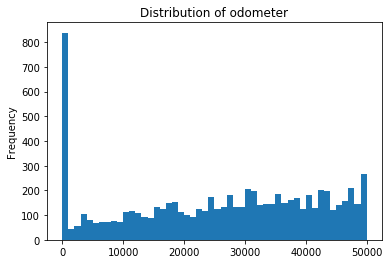

In [40]:
# distribution of odometer before replacement
vehicle['odometer'].plot(kind='hist', bins=50, range=(0, 50000), title='Distribution of odometer')
plt.show()

In [41]:
# distribution of brands for missing odometer
vehicle[vehicle['odometer'].isnull()]['brand'].value_counts()

ford             1953
chevrolet        1581
toyota            809
ram               527
nissan            515
honda             506
jeep              496
gmc               372
hyundai           192
subaru            190
dodge             180
chrysler          131
volkswagen        119
kia               104
cadillac           57
buick              45
mercedes-benz      41
bmw                39
acura              35
Name: brand, dtype: int64

In [42]:
# number of mercedes-benz ads missing odometer value
vehicle[(vehicle['odometer'].isnull()) & (vehicle['brand'] == 'mercedes-benz')].shape

(41, 14)

In [43]:
# median odometer across brands
brand_odometer = dict(
        zip(
            vehicle.groupby('brand')['odometer'].median().index, 
            vehicle.groupby('brand')['odometer'].median().values.round()
        )    
)
def fill_odometer(brand):
    """
    Populate the median odometer
    by brand
    """
    return int(brand_odometer[brand])

In [44]:
# populate the missing odometer using the median computed across each brand
# exclude mercedes-benz as the odometer is missing for all ads
mask = ((vehicle['odometer'].isnull()) & (vehicle['brand'] != 'mercedes-benz'))
vehicle.loc[mask, 'odometer'] = vehicle.loc[mask, 'brand'].apply(fill_odometer)

In [45]:
# check missing post replacement
vehicle['odometer'].isnull().sum()

41

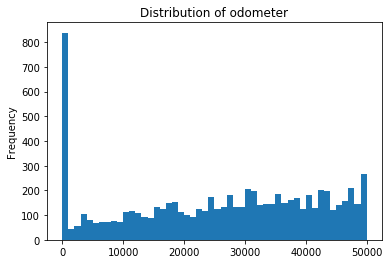

In [46]:
# distribution of odometer after replacement
vehicle['odometer'].plot(kind='hist', bins=50, range=(0, 50000), title='Distribution of odometer')
plt.show()

1) There are outliers in this field at both ends of the spectrum.

2) The missing values were replaced by computing the median across the brands, and post replacement, we can see that
there is no noticeable change in distribution.

3) Mercedes-Benz is the only brand where the odometer reading is missing. Additionally, the `price` is identical for all the
41 ads; the , `model_year` and `cylinders` seem mostly the same, but in some ads, they are different. However, this is 
suspicious as the prices can't all be identical.

5) `paint_color`

In [47]:
# replace the missing value with unknow as this is not an important field
vehicle.loc[vehicle['paint_color'].isnull(), 'paint_color'] = 'unknown'

In [48]:
# check for missing values
vehicle['paint_color'].isnull().sum()

0

1) The missing values in this field were replaced with 'unknown'; its impact on `price` would be miniscule given these are ads for second hand vehicles.

**Conclusion**

1) The following fields:  `model_years`, `cylinders`, `odometer`, and `is_4wd` were converted to integer data type. `date_posted` was converted to date object.

2) The `brand` field was created which was extracted from the `model_type` field. Based on the distribution - ford, chevrolet and toyota are most popular brands whose vehicles are advertised in this dataset.

3) The `model_years` and `cylinders` attributes had their missing values replaced by computing the probability of the 
attribute type occuring in the ad; this ensures that the overall distribution doesn't change noticeably. Otherwise, there is a chance of affecting the overall distribution if we used the mode or median. Having said that, the most appropriate way of filling these fields is to scrape data from a reliable source.

4) The `odometer` attribute had its missing values replaced by computing the median of miles traveled across the `brands` rather than by a single value, which could have altered the overall distribution.

5) There are outliers in `odometer` at both ends of the spectrum; this will need to be computed in the exploratory section.

6) The `brand` Mercedez-Benz was the only model for which the `odometer` value was missing for all the records, which is suspicious, but as these were only 44 in number, it is insignificant; this could possibly be a human error.

7) The missing values in `is_4wd` was replaced with 0. ideally, this information should have been scraped off some reliable source based on the `model_type` and `model_year`.

8) The missing values in `paint color` was replaced with keyword 'unknown'.

## Make calculations and add them to the table

Calculate dow, week, month, and year from `date_posted`

In [49]:
vehicle['week'] = vehicle['date_posted'].dt.week
vehicle['month'] = vehicle['date_posted'].dt.week
vehicle['year'] = vehicle['date_posted'].dt.year
vehicle['dow'] = vehicle['date_posted'].dt.dayofweek

Calculate age of the vehicle by taking the difference between `date_posted` year and `model_year`

In [50]:
vehicle['age'] = vehicle['year'] - vehicle['model_year']

In [51]:
# check of negative age
vehicle[vehicle['age'] < 0].shape[0]

16

In [52]:
# replace negative age with 0
vehicle.loc[vehicle['age'] < 0, 'age'] = 0

In [53]:
# check after replacement
vehicle[vehicle['age'] < 0].shape[0]

0

In [54]:
# number of ads with age = 0
vehicle[vehicle['age'] == 0].shape[0]

2260

In [55]:
def calculate_miles_per_age(row):
    """
    Calculate the miles per years of
    ownership of the vehicle driven
    """
    miles, age = row[0], row[1]
    try:
        return miles / age
    except ZeroDivisionError:
        return miles

In [56]:
# call the function to calculate the miles_per_age
vehicle['miles_per_age'] = vehicle[['odometer', 'age']].apply(calculate_miles_per_age, axis=1)

In [57]:
# check distribution of the new field
vehicle['miles_per_age'].describe()

count     51484.000000
mean      19862.543693
std       19244.702443
min           0.000000
25%       10257.818182
50%       15054.041667
75%       22400.000000
max      373200.000000
Name: miles_per_age, dtype: float64

Replace the `condition` of the vehicle with ordinal values

<bold>new = 5</bold><br/>
<bold>like new = 4</bold><br/>
<bold>excellent = 3</bold><br/>
<bold>good = 2</bold><br/>
<bold>fair = 1</bold><br/>
<bold>salvage = 0</bold><br/>

In [58]:
condition_level = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

In [59]:
def replace_condition(condition):
    """
    Replace condition with a numeric
    value
    """
    return condition_level[condition]

In [60]:
# call the function to replace condition
vehicle['condition'] = vehicle['condition'].apply(replace_condition)

In [61]:
# check distribution post replacement
vehicle['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

**Conclusion**

1) There are 23 ads with negative age, and these were replaced with 0.

2) There are 2277 ads which is 4% of the total that have 0 age reported.

## Carry out exploratory data analysis

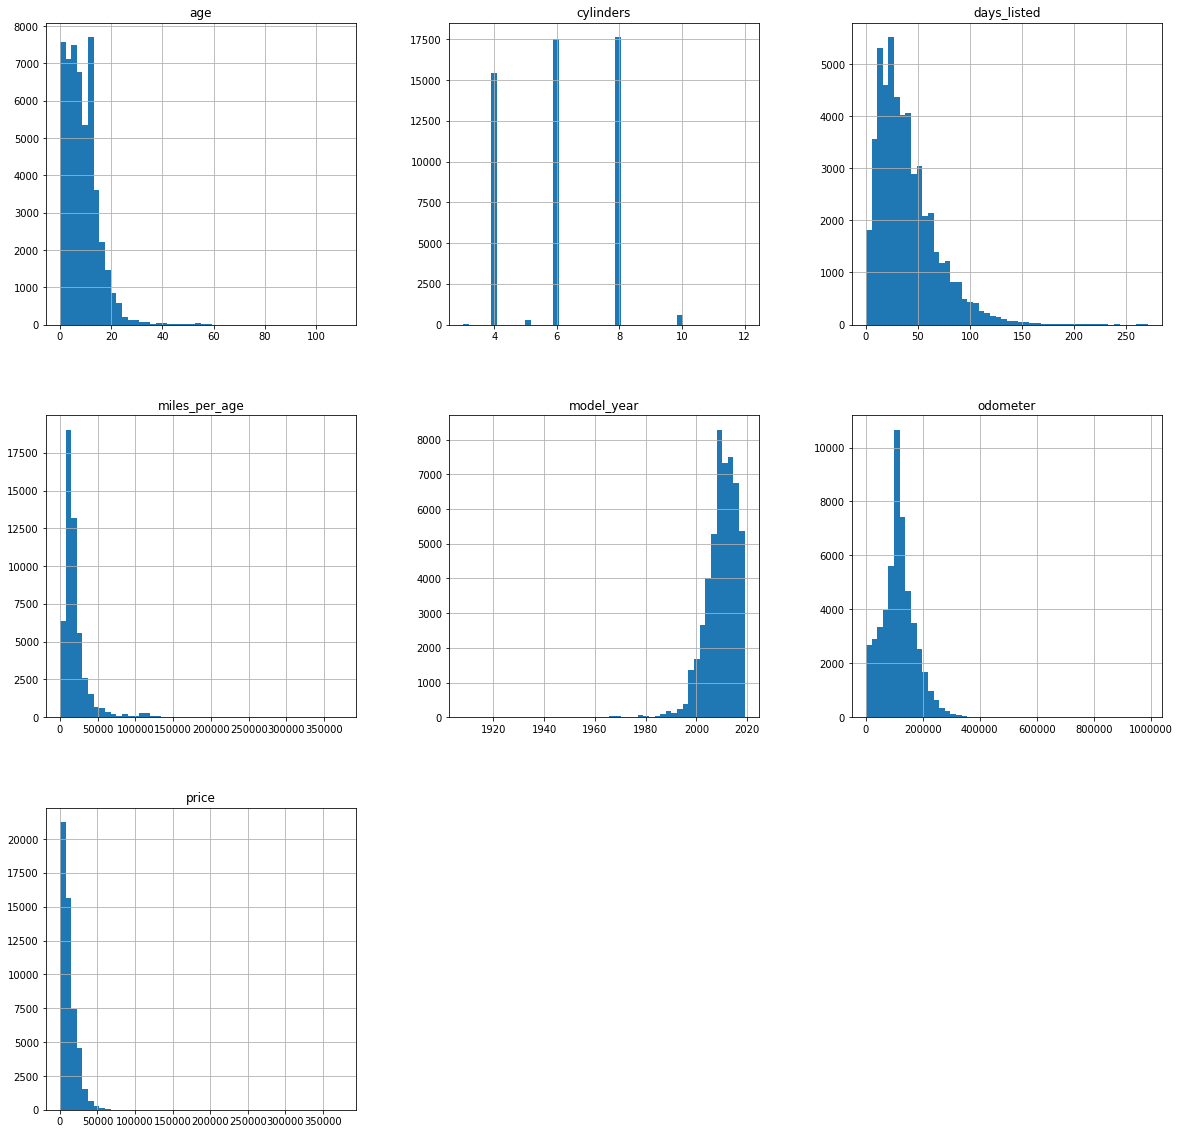

In [62]:
fields = ['price', 'model_year', 'age', 'cylinders', 'odometer', 'miles_per_age', 'days_listed']
vehicle[fields].hist(bins=50, figsize=(20, 20))
plt.show()

In [63]:
# cut the age field into 50 bins
pd.cut(vehicle['age'], bins=50, include_lowest=False).value_counts().head(3)

(8.8, 11.0]     8310
(-0.11, 2.2]    7575
(4.4, 6.6]      7482
Name: age, dtype: int64

In [64]:
# cut the days_listed field into 50 bins
pd.cut(vehicle['days_listed'], bins=50, include_lowest=False).value_counts().head(3)

(21.68, 27.1]     5519
(10.84, 16.26]    5314
(16.26, 21.68]    4588
Name: days_listed, dtype: int64

In [65]:
# cut the miles_per_age field into 50 bins
pd.cut(vehicle['miles_per_age'], bins=50, include_lowest=False).value_counts().head(3)

(7464.0, 14928.0]     19038
(14928.0, 22392.0]    13178
(-373.2, 7464.0]       6391
Name: miles_per_age, dtype: int64

In [66]:
vehicle['model_year'].value_counts().head(2)

2013    3815
2012    3711
Name: model_year, dtype: int64

In [67]:
# cut the odometer field into 50 bins
pd.cut(vehicle['odometer'], bins=50, include_lowest=False).value_counts().head(3)

(112320.0, 118560.0]    3770
(106080.0, 112320.0]    3712
(124800.0, 131040.0]    3113
Name: odometer, dtype: int64

In [68]:
# cut the price field into 50 bins
pd.cut(vehicle['price'], bins=50, include_lowest=False).value_counts().head(3)

(-373.999, 7500.98]     21246
(7500.98, 15000.96]     15655
(15000.96, 22500.94]     7427
Name: price, dtype: int64

**Conclusion**

1) The age histogram shows that there are ads with vehicles having 0 age; the distribution is right skewed, and there are 2 peaks, one at around 0 - 2 years and the other at 8 - 11 years.

2) The most common `cylinders` are 6 and 8.

3) The `days_listed` attribute is right-skewed with a peak in the range 21 - 27 days.

4) `miles_per_age` is a right skewed distribution which peaks in the ranges 8K - 15K miles per age.

5) `model_year` is left skewed, and the distribution peaks at 2013.

6) The `odometer` field is also right-skewed; it peaks in the ranges 110K - 118K miles. There are outliers at both ends of the spectrum.

7) The `price` field is right-skewed with most ads in the range \\$1 - \\$7500.

### Compute the upper and lower limits of the outliers

In [69]:
def compute_outliers(df, field):
    """
    Compute outliers for a field
    """
    range = df[field].max() - df[field].min()
    q1 = df[field].quantile(0.25)
    q3 = df[field].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    return lb, ub

In [70]:
# compute outliers for price
price_filter = compute_outliers(vehicle, 'price')

In [71]:
# before removal of outliers
price_filter

(-12758.5, 34597.5)

1) The upper bound for `price` is \$34,598.

In [72]:
# filter cars with price above $35K
vehicle_filtered = vehicle[vehicle['price'] <= 35000]

In [73]:
vehicle_filtered.shape

(50111, 20)

In [74]:
# compute outliers for odometer
odometer_filter = compute_outliers(vehicle, 'odometer')

In [75]:
# before removal of outliers
odometer_filter

(-22264.25, 247989.75)

1) The upper bound for `odometer` is 247990 miles.

In [76]:
# filter cars with odometer above $250K
vehicle_filtered = vehicle_filtered[vehicle_filtered['odometer'] <= 250000]

In [77]:
vehicle_filtered.shape

(49025, 20)

In [78]:
# 185 ads with odometer = 0 miles
vehicle_filtered[vehicle_filtered['odometer'] == 0].shape

(182, 20)

In [79]:
vehicle_filtered = vehicle_filtered[vehicle_filtered['odometer'] > 0]

In [80]:
vehicle_filtered.shape

(48843, 20)

In [81]:
# compute outliers for model_year
model_year_filter = compute_outliers(vehicle, 'model_year')

In [82]:
# before removal of outliers 
model_year_filter

(1994.0, 2026.0)

1) The lower bound for `model_year` is 1994.

In [83]:
# filter cars with age made older than 1980
vehicle_filtered = vehicle_filtered[vehicle_filtered['model_year'] >= 1994]

In [84]:
vehicle_filtered.shape

(48144, 20)

In [85]:
# compute outliers for days_listed
days_listed_filter = compute_outliers(vehicle, 'days_listed')

In [86]:
days_listed_filter

(-32.0, 104.0)

1) The upper bound for `days_listed` is 104 days.

In [87]:
# filter cars that have spent more than 150 days
vehicle_filtered = vehicle_filtered[vehicle_filtered['days_listed'] <= 104]

In [88]:
vehicle_filtered.shape

(46641, 20)

In [89]:
# recompute age
vehicle_filtered['age'] = vehicle_filtered['year'] - vehicle_filtered['model_year']

In [90]:
vehicle_filtered.loc[vehicle_filtered['age'] < 0, 'age'] = 0

In [91]:
# recompute miles_per_age
vehicle_filtered['miles_per_age'] = vehicle_filtered[['odometer', 'age']].apply(calculate_miles_per_age, axis=1)

In [92]:
# 9.5% of the data was removed in all
100 * (1 - vehicle_filtered.shape[0] / vehicle.shape[0])

9.478893740902471

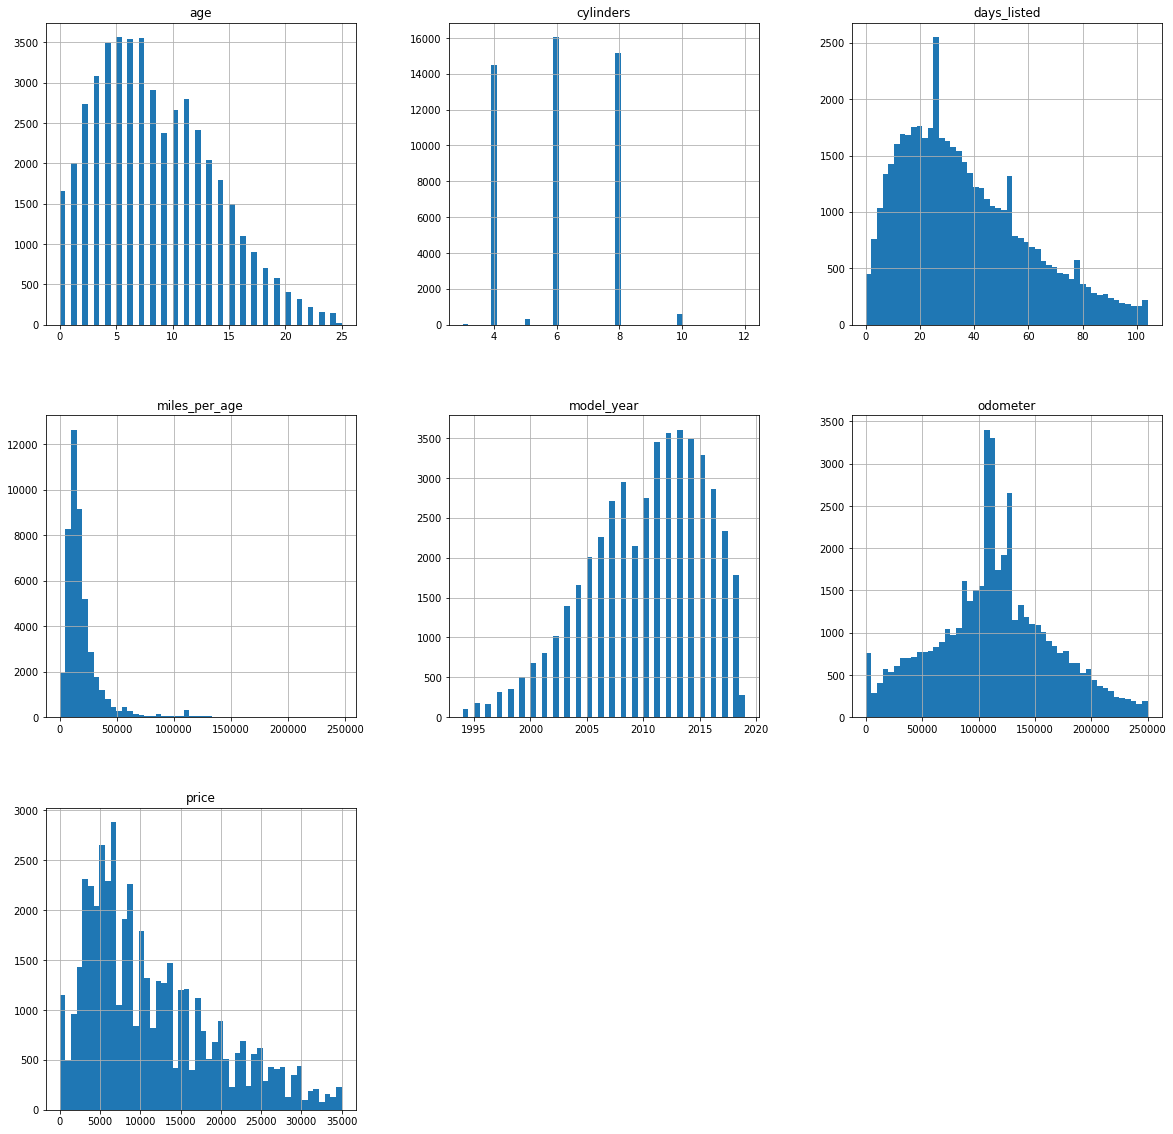

In [93]:
vehicle_filtered[fields].hist(bins=50, figsize=(20, 20))
plt.show()

1) Just removing about 9.5% of the ads has brought about a significant improvement in the distribution of the histogram for
`age`, `days_listed`, `model_year`, `odometer` and `price`.

2) In the original histogram for `age`, we noticed 2 peaks. However, in the cleaned histogram, there is 1 peak. The `age` appears to peak at 5 years.

3) `days_listed` shows a nice peak between 28-32 days.

4) `price` has a peak around \$7000.

5) `odometer` peaks at 125K miles, and it looks much cleaner with the outliers removed. At the lower end, we can see some very small readings.

6) `model_year` continues to peak at 2013.

In [94]:
# mean and median number of days_listed - unfiltered
vehicle['days_listed'].mean(), vehicle['days_listed'].median()

(39.55475982532751, 33.0)

In [95]:
# shortest and longest days_listed - unfiltered
vehicle['days_listed'].min(), vehicle['days_listed'].max()

(0, 271)

In [96]:
# mean and median number of days_listed - filtered
vehicle_filtered['days_listed'].mean(), vehicle_filtered['days_listed'].median()

(36.66570185030338, 32.0)

In [97]:
# shortest and longest days_listed - filtered
vehicle_filtered['days_listed'].min(), vehicle_filtered['days_listed'].max()

(0, 104)

In [98]:
# number of ads that spent 0 days
vehicle_filtered[vehicle_filtered['days_listed'] == 0].shape[0]

49

In [99]:
# number of ads that spent 150 days
vehicle_filtered[vehicle_filtered['days_listed'] == 104].shape[0]

76

7) The mean and median number of `days_listed` for an ad post filteration of outliers are 37 days and 32 days respectively.
The shortest time an ad has spent on the site is 0 days for 49 ads, and the longest time an ad spent is 104 days for 76 ads. It
is debatable that some cars are sold the day they are posted on the site; this can be clarified by the product owner /sales if this
represents a realistic situation or not.

### Dependence between number of ads placed versus vehicle type and average price

In [100]:
# pivot table grouped by type. compute the count of ads and median price by type
type_and_price = vehicle.pivot_table(index='type', values='price', aggfunc=['count', 'median'])
type_and_price.columns = ['count', 'median_price']

In [101]:
type_and_price.sort_values('count', ascending=False)

,count,median_price
type,,
SUV,12405,8900
truck,12353,14995
sedan,12154,5995
pickup,6988,14200
coupe,2303,12950
wagon,1541,7900
mini-van,1161,6495
hatchback,1047,5980
van,633,7990


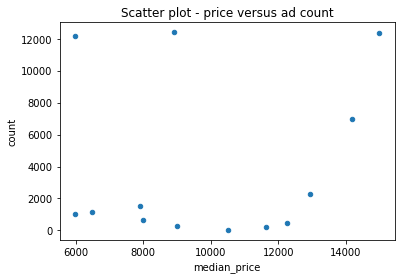

In [102]:
type_and_price.plot(kind='scatter', x='median_price', y='count', title='Scatter plot - price versus ad count')
plt.show()

1) There appears to be no relationship between median price and ad count per `type` of vehicle in the unfiltered dataset. Moreover,
we can see some outliers where the ad count is 12K.

2) The 2 popular vehicle `type` based on ad count are: SUV and truck.

In [103]:
# pivot table grouped by type. compute the count of ads and mean price by type
# type_and_price = vehicle.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
# type_and_price.columns = ['count', 'mean_price']

In [104]:
#type_and_price.sort_values('mean_price', ascending=False)

### Impactful features of price

In [105]:
corr_fields = ['age', 'days_listed', 'odometer', 'price']
vehicle[corr_fields].corr()

,age,days_listed,odometer,price
age,1.000000,0.007207,0.407364,-0.399540
days_listed,0.007207,1.000000,0.003083,-0.000682
odometer,0.407364,0.003083,1.000000,-0.384615
price,-0.399540,-0.000682,-0.384615,1.000000


1) Althogh expected, there is a moderate negative correlation between `age` of the car and `price`.

2) As expected, there is a moderate negative correlation between `odometer` and `price`.

3) There is no relationship between `days_listed` and `price`.

### Plot Box and whisker plots for condition, transmission and color type

In [106]:
def create_df_with_50ads(df, field, col='price', types=None):
    """
    Create a new DataFrame in which only
    categories that have at least 50 ads will
    be included; this DataFrame is used subsequently
    to create Boxplots
    """
    box_df = pd.DataFrame()
#    for field in fields:
    for name, grp in df.groupby(field):
        # at least 50 ads in each category
        if len(grp) > 50:
            box_df = pd.concat([box_df, grp[grp[field] == name][[field, col, 'type']].rename(columns={field: 'category'})], 
                               axis=0, sort=False)
    return box_df[box_df['type'] == types] if types is not None else box_df
            

In [107]:
# fields = ['condition', 'transmission', 'paint_color']

In [108]:
def plot_boxplot(df, field, types=None, title=None):
    """
    Plot Boxplot
    """
    box_df = create_df_with_50ads(df, field, types=types)
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    box_df.boxplot(by='category', column='price', figsize=(9, 7))
    plt.suptitle("")
    plt.title(title)
    plt.show()

In [109]:
# median price by condition
vehicle_filtered.groupby(['condition'])['price'].median()

condition
0     2925
1     2500
2     7950
3     9995
4    12995
5    12300
Name: price, dtype: int64

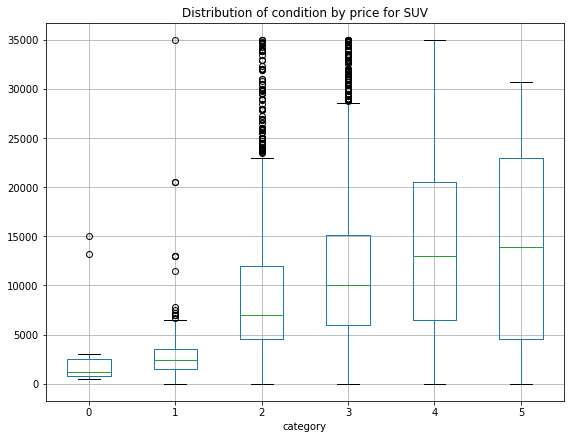

In [110]:
types = 'SUV'
plot_boxplot(vehicle_filtered, 'condition', types=types, title='Distribution of condition by price for SUV')

1) The median price for trucks with condition of 2, 3, 4, and 5 are slightly higher than the median price of vehicles in the filtered dataframe; this suggests that `condition` impacts `price`.

2) There are moderate number of outliers in category 1, which is interesting. Are the buyers really paying so much for cars that are
in a fair condition?

In [111]:
# median price by transmission
vehicle_filtered.groupby(['transmission'])['price'].median()

transmission
automatic     8995
manual        6999
other        21100
Name: price, dtype: int64

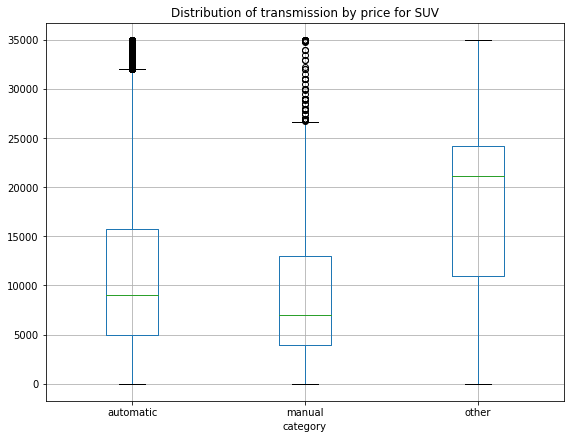

In [112]:
plot_boxplot(vehicle_filtered, 'transmission', title='Distribution of transmission by price for SUV')

1) Comparing the median prices across the various `transmission` categories with the median prices in the filtered dataset, we can see that SUV's are closer to the overall median price, which implies that there is a small impact of `transmission` on `price`.

2) In the `transmission` class for SUV, the other class has a relatively higher median price.

In [113]:
# median price by paint_color
vehicle_filtered.groupby(['paint_color'])['price'].median()

paint_color
black      10800.0
blue        7500.0
brown       7500.0
custom      7991.0
green       5995.0
grey        8495.0
orange     14997.0
purple      5497.5
red         8500.0
silver      7999.0
unknown     9000.0
white      10999.0
yellow     17490.0
Name: price, dtype: float64

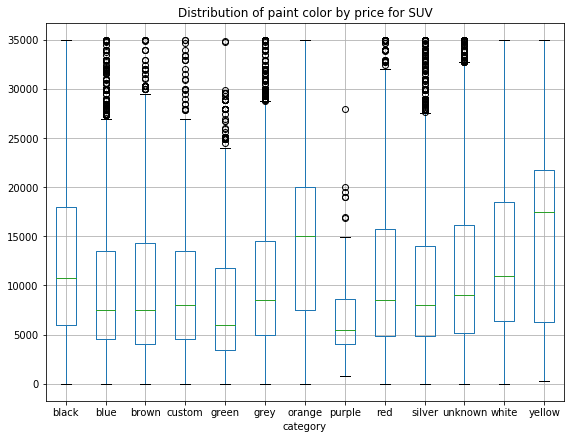

In [114]:
plot_boxplot(vehicle_filtered, 'paint_color', title='Distribution of paint color by price for SUV')

1) Looking at the colors with relatively higher median prices, we can see that black, organge and yellow have a comparable median price which closely shadows the overall median price; this suggests that `paint_color` has a small dependence on `price`.

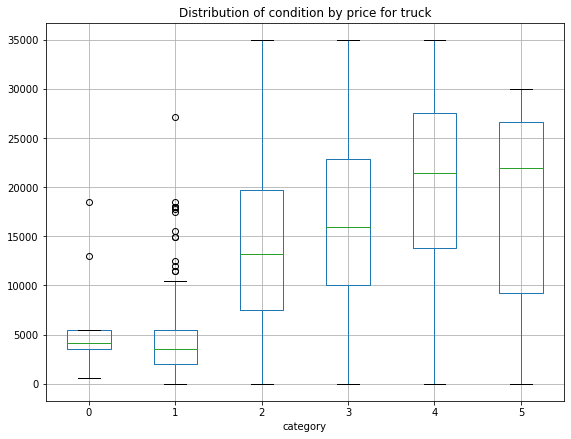

In [115]:
types = 'truck'
plot_boxplot(vehicle_filtered, 'condition', types=types, title='Distribution of condition by price for truck')

1) The median prices for `condition` of truck in the categories of 2, 3, 4, and 5 are higher than the overall 
median price; this clearly suggests that `condition` of the truck influences `price`.

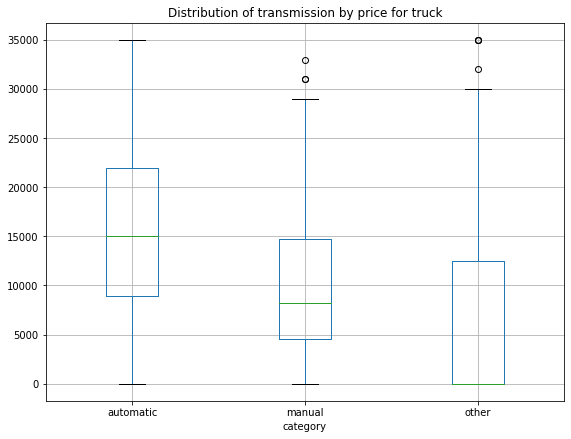

In [116]:
plot_boxplot(vehicle_filtered, 'transmission', types=types, title='Distribution of transmission by price for truck')

1) Compared to SUV, drivers prefer truck with automatic `transmission` just going by the relatively higher median price in this segment, which
is also higher than overall median price. This suggests that for some vehicle `type` `transmission` influences `price`.

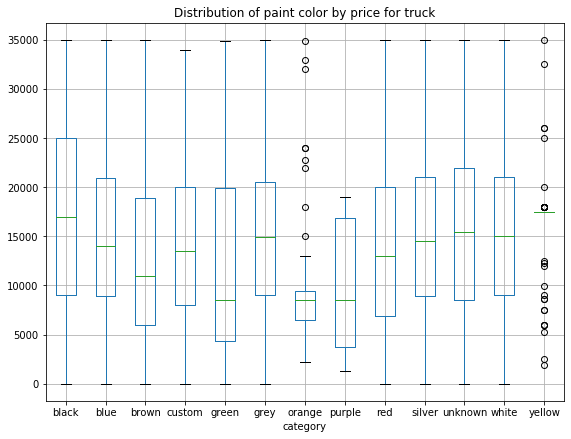

In [117]:
plot_boxplot(vehicle_filtered, 'paint_color', types=types, title='Distribution of paint color by price for truck')

1) For trucks we can see some deviation from the norm, that is, drivers have some preference for `paint_color`, but in the 
overall dataset, it might not be that important. So, its influence on `price` is subjective to the `type` of vehicle.

### Plot Scatter plots for age and odometer

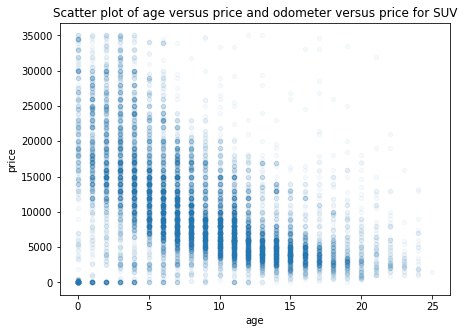

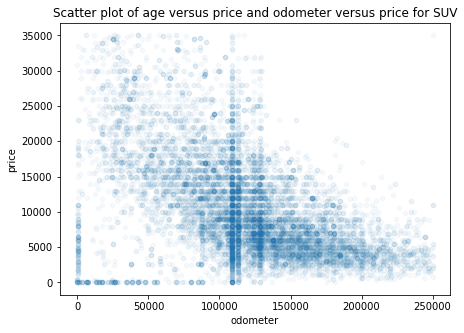

In [118]:
numeric_fields = ['age', 'odometer']
mask = vehicle_filtered['type'] == 'SUV'
for field in numeric_fields:
    vehicle_filtered[mask].plot(kind='scatter', x=field, y='price', alpha=0.04, figsize=(7, 5), 
                               title='Scatter plot of age versus price and odometer versus price for SUV')
plt.show()

In [119]:
# correlation for SUV
vehicle_filtered[mask][corr_fields].corr()

,age,days_listed,odometer,price
age,1.000000,0.011214,0.523097,-0.550126
days_listed,0.011214,1.000000,0.011011,-0.014355
odometer,0.523097,0.011011,1.000000,-0.477497
price,-0.550126,-0.014355,-0.477497,1.000000


1) From the above plots, the dependence between `price` and `age` and between `price` and `odometer` show a moderate negative correlation. Again, visually, it is not very prominent.

2) However, the correlation for SUV seems to be more significant between `age` and `price` than it is between `odometer` and `price`. Both these numbers are relatively higher than it is for the overall dataset.

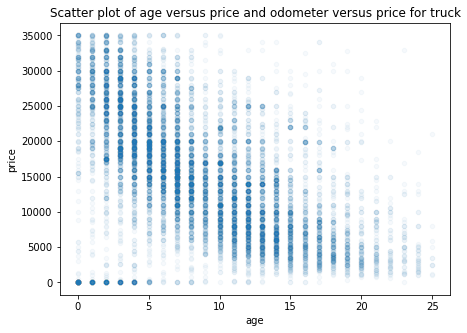

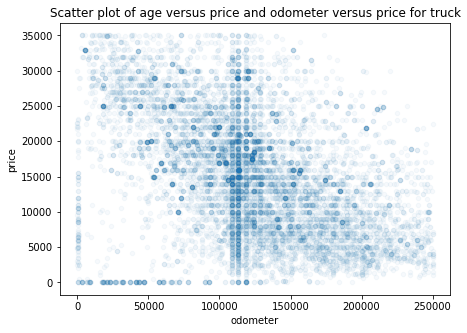

In [120]:
numeric_fields = ['age', 'odometer']
mask = vehicle_filtered['type'] == 'truck'
for field in numeric_fields:
    vehicle_filtered[mask].plot(kind='scatter', x=field, y='price', alpha=0.04, figsize=(7, 5), 
                               title='Scatter plot of age versus price and odometer versus price for truck')
plt.show()

In [121]:
# correlation for truck
vehicle_filtered[mask][corr_fields].corr()

,age,days_listed,odometer,price
age,1.000000,0.016354,0.455278,-0.569396
days_listed,0.016354,1.000000,0.007941,0.009118
odometer,0.455278,0.007941,1.000000,-0.409628
price,-0.569396,0.009118,-0.409628,1.000000


1) From the above plots, the dependence between `price` and `age` and between `price` and `odometer` show a moderate negative correlation. Again, visually, it is not very prominent.

2) However, the correlation for truck seems to be more significant between `age` and `price` than it is between `odometer` and `price`.  Both these numbers are relatively higher than it is for the overall dataset.

## Overall conclusion

1) There are ~51K records and 13 attributes. Each row describes an advertisement placed for a car.

2) The unfiltered `price` ranges from \\$1 to \\$375,000; the `odometer` value ranges from 0 - 990K miles. 
The `model_year` ranges from 1908 - 2019. These fields have wide ranging values.

3) Based on the `brand` distribution - ford, chevrolet and toyota are most popular brands with 54% of the ads placed
on this site.

4) The brand Mercedez-Benz is the only model for which the odometer value is missing for all the records, which is suspicious, but as these were only 44 in number, it is insignificant; this could possibly be a human error as the ad posted on the site is not verified.

5) About 2227(4%) of the ads have a reported car `age` of 0 years.

6) After removing 10% of the ads we observe the following: a) The `age` appears to peak at 5 years. b) `days_listed` shows a nice peak between 28-32 days. c) `price` has a peak around $7000. d) `odometer` peaks at 125K miles, and it looks much cleaner with the outliers removed. e) `model_year` continues to peak at 2013.

7) The mean number of days an ad is posted is 37 days.

8) The top 2 vehicle `type` based on frequency of ads posted are: SUV and truck.

9) Analysing the influence of the following factors such as `transmission`, `condition`, `paint_color`, `age` and `odometer` for these 2 vehicles, we notice that `condition` of the vehicle and `age` play an important role in deciding the `price`; When we look at `transmission` however, we can see that it plays a relatively more important role for truck than it does for SUV. Similarly, `paint_color` is not so important in deciding the `price` for SUV as much as it does for truck (this needs to be validated); While `odometer` should have been an important factor in determining `price`, in this dataset, it appears that it has a moderate influence on `price`. However, is plays a relatively more important role for SUV and truck than it does for other vehicle `type`.
